<a href="https://colab.research.google.com/github/ChhaSahil/CarPrice_Evaluation/blob/main/Car_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Geely Automotive Pricing model
##Problem Statement-<p>A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

<li>Which variables are significant in predicting the price of a car.</li>
<li>How well those variables describe the price of a car.</li>
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.</p>

-------------------------------------------------------------------

#Let's Go!!
<img src='https://www.insidehook.com/wp-content/uploads/2021/09/2021-Alfa-Romeo-Giulia-Quadrifoglio.jpg?fit=1500%2C1000'>

In [ ]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [ ]:
car = pd.read_csv('/content/CarPrice_Assignment.csv')

In [ ]:
car.shape

(205, 26)

Our dataset has 205 <u>Rows</u> and 26 <u>Columns</u>.

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Our data is free from any Null values

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


###Let's Clean the Data

In [ ]:
car.loc[:,'Company']=car['CarName'].str.split(' ').str[0]

In [ ]:
car['Company']=car['Company'].apply(lambda x:str(x).lower())

In [ ]:
car.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

##We can see that some of the company's name are incorrect.

In [ ]:
car.Company.replace('alfa-romero','alfa-romeo',inplace=True)

In [ ]:
car.Company.replace('maxda','mazda',inplace=True)

In [ ]:
car['Company'].replace('vokswagen','volkswagen',inplace=True)
car['Company'].replace('porcshce','porsche',inplace=True)
car['Company'].replace('vw','volkswagen',inplace=True)

In [ ]:
car['Company'].replace('toyouta','toyota',inplace=True)

In [ ]:
car.Company.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
car.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

###'MPFI' and 'MFI' are considered to be same fuelsystem.

In [ ]:
car.fuelsystem.replace('mfi','mpfi',inplace=True)

In [ ]:
car.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

Here ohc is mis-spelled as ohcv and dohc is mis-spelled as dohcv

In [ ]:
car.enginetype.replace('ohcv','ohc',inplace=True)

In [ ]:
car.enginetype.replace('dohcv','dohc',inplace=True)

In [ ]:
car.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

Here 'fwd' is mis-spelled as '4wd'.

In [ ]:
car.drivewheel.replace('4wd','fwd',inplace=True)

In [ ]:

car.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [ ]:
car.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [ ]:
car.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [ ]:
car.doornumber.unique()

array(['two', 'four'], dtype=object)

In [ ]:
car.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [ ]:
#we can drop car_ID and car name
car.drop(['car_ID','CarName'],axis=1,inplace=True)

###Let's Visualize Our Data

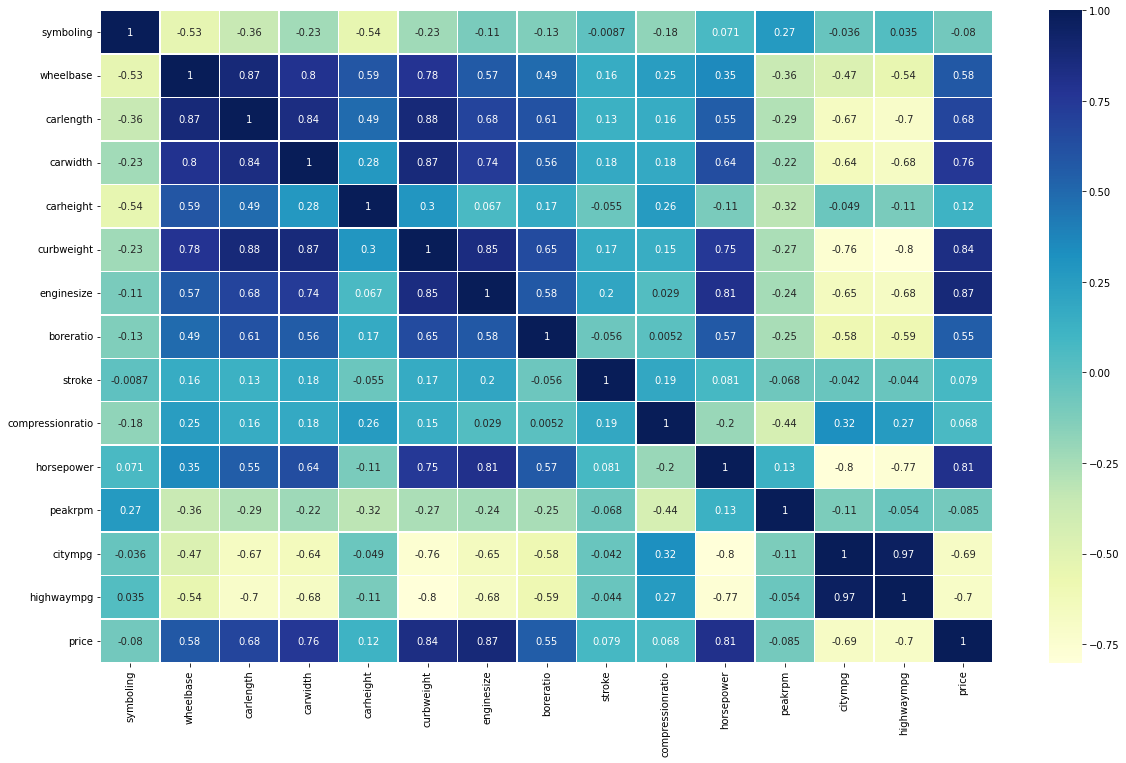

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(car.corr(), linewidths=.5, annot=True, cmap="YlGnBu")

Hence from above heatmap we can conclude that 'Price' is highly(positive and negative) corelated with:
<li>Enginsize</li>
<li>Horsepower</li>
<li>Curbweight</li>
<li>Carlength</li>
<li>Carwidth</li>
<li>WheelBase</li>
<li>Boreratio</li>
<li>Highwaympg</li>
<li>Citympg</li>

##Let's Visualize our Categorical Features

First we will convert 'symbolling' feature into category.
Let's make the category clear by classifying based on risk:

<li>-ve symboling as safe</li>
<li>0, 1 as moderate</li>
<li>2,3 as risky</li>

In [ ]:
car['symboling'] = car['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

Let's Create a few visualizing functions

In [ ]:
def plot_percentages(df,features,sortbyindex=False):
  plt.figure(figsize=(30,30))
  for i in features:
    plt.subplot(3,4,features.index(i)+1)
    value=(df[i].value_counts(normalize=True)*100)
    if sortbyindex:
      value=value.sort_index()
    ax=value.plot.bar(color=sns.color_palette('inferno'))
    ax.set_ylabel('% in data',fontsize=15,weight='bold')
    ax.set_xlabel(i,fontsize=15,weight='bold')  
    for p in ax.patches:
        ax.annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01),weight='bold')

In [ ]:
def plot_mean_price(df,features,sortbyindex=False):
  plt.figure(figsize=(40,30))
  for i in features:
    plt.subplot(3,4,features.index(i)+1)
   
    mean_price=df[[i,'price']].groupby([i],as_index=False).mean()
    print(mean_price)
    if sortbyindex:
      
      mean_price=mean_price.sort_index()
    
    ax=sns.barplot(x=i,y='price',data=mean_price,palette='inferno_r')
    ax.set_ylabel('price',fontsize=15,weight='bold')
    ax.set_xlabel(i,fontsize=15,weight='bold')  
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01),weight='bold')

In [ ]:
def plot_dist(var_list):
#Function to plot the distribution plot of the numeric variable list
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(3,5,var_list.index(var)+1)
        sns.distplot(car[var])
    plt.show()

In [ ]:
categorical_features=list(car.columns[car.dtypes=='object'])

In [ ]:
categorical_features

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'Company']

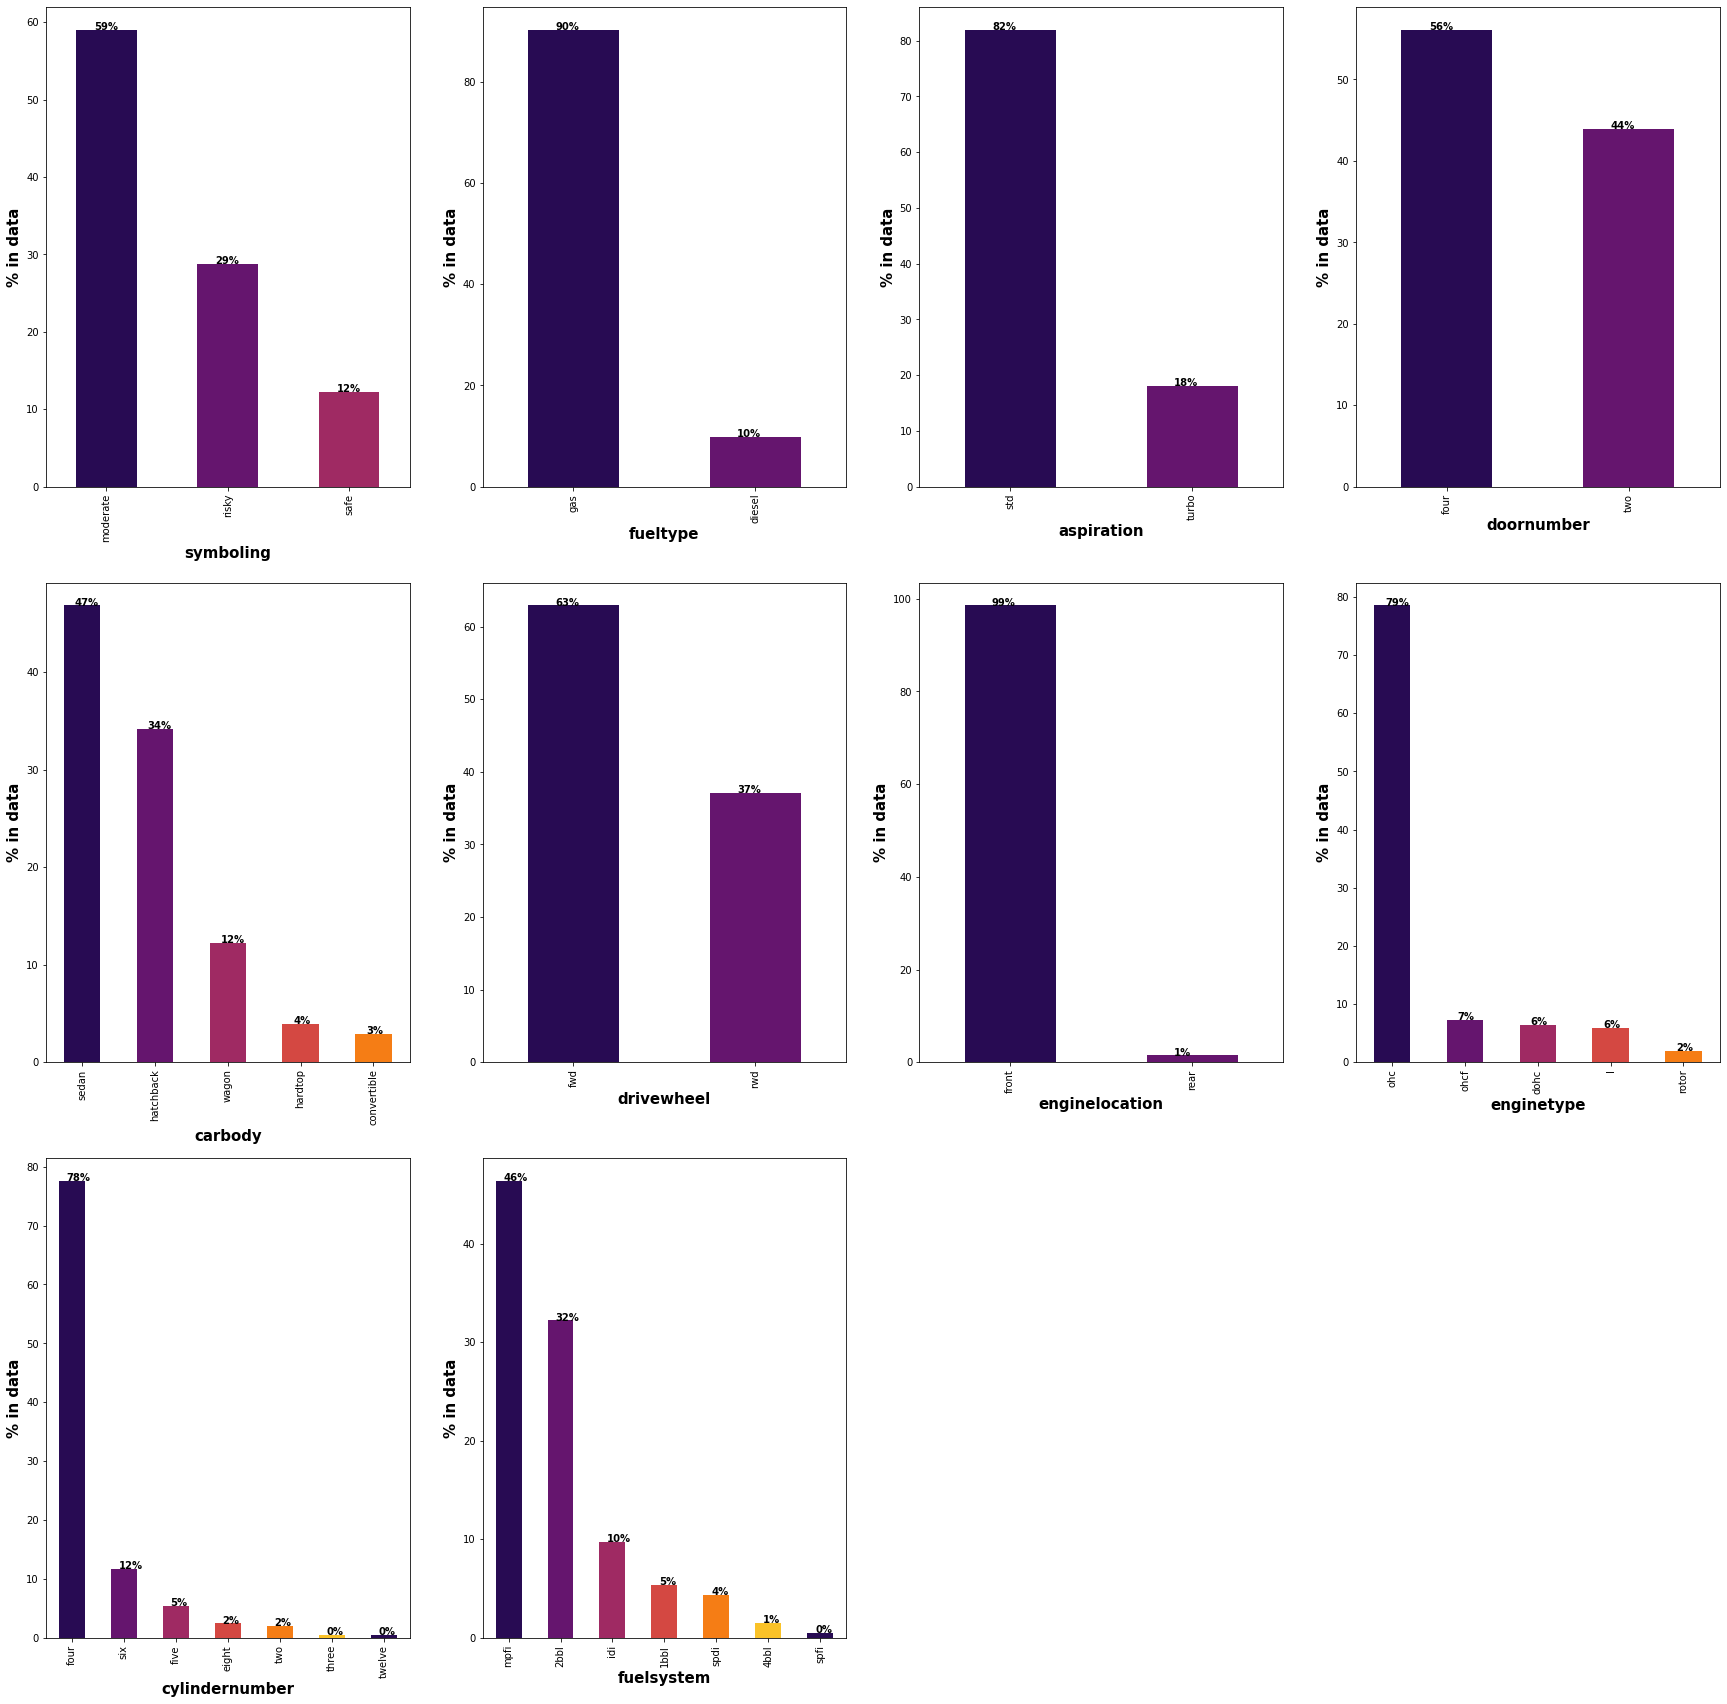

In [ ]:
# market percentage of car's with respect to features
plot_percentages(car,categorical_features[:-1])

We can notice that some of the car features that are predominant in the US Automobile Market, Geely Automotives can consider these facts to full fill the market dominant needs and make the needed changes to their manufacturing line. 
The features are:
<li>Symbolling- {0,1}</li>
<li>Fuel Type-- <i>Gas</i></li>
<li>Aspiration- <i>Standard</i></li>
<li>Car Body- <i>SEDAN</i></li>
<li>Door Number- <i>4</i></li>
<li>Drive Wheel- <i>Forward</i></li>
<li>Engin Location- <i>Front</i></li>
<li>Engine Type- <i>Overhead Camshaft(ohc)</i></li>
<li>Cylinder Number-  <i>Four</i></li>
<li>Fuel System-  <i>Multi Port Fuel Injection(mpfi)</i></li>


------------------------------------------------------------------

Let's See the Expense side of these features

  symboling         price
0  moderate  12434.988983
1     risky  13363.932203
2      safe  17144.800000
  fueltype       price
0   diesel  15838.1500
1      gas  12999.7982
  aspiration         price
0        std  12611.270833
1      turbo  16298.166676
  doornumber         price
0       four  13501.152174
1        two  12989.924078
       carbody         price
0  convertible  21890.500000
1      hardtop  22208.500000
2    hatchback  10376.652386
3        sedan  14344.270833
4        wagon  12371.960000
  drivewheel         price
0        fwd   9368.249357
1        rwd  19910.809211
  enginelocation         price
0          front  12961.097361
1           rear  34528.000000
  enginetype         price
0       dohc  19138.269231
1          l  14627.583333
2        ohc  12666.075571
3       ohcf  13738.600000
4      rotor  13020.000000
  cylindernumber         price
0          eight  37400.100000
1           five  21630.469727
2           four  10285.754717
3            six  23671.833333


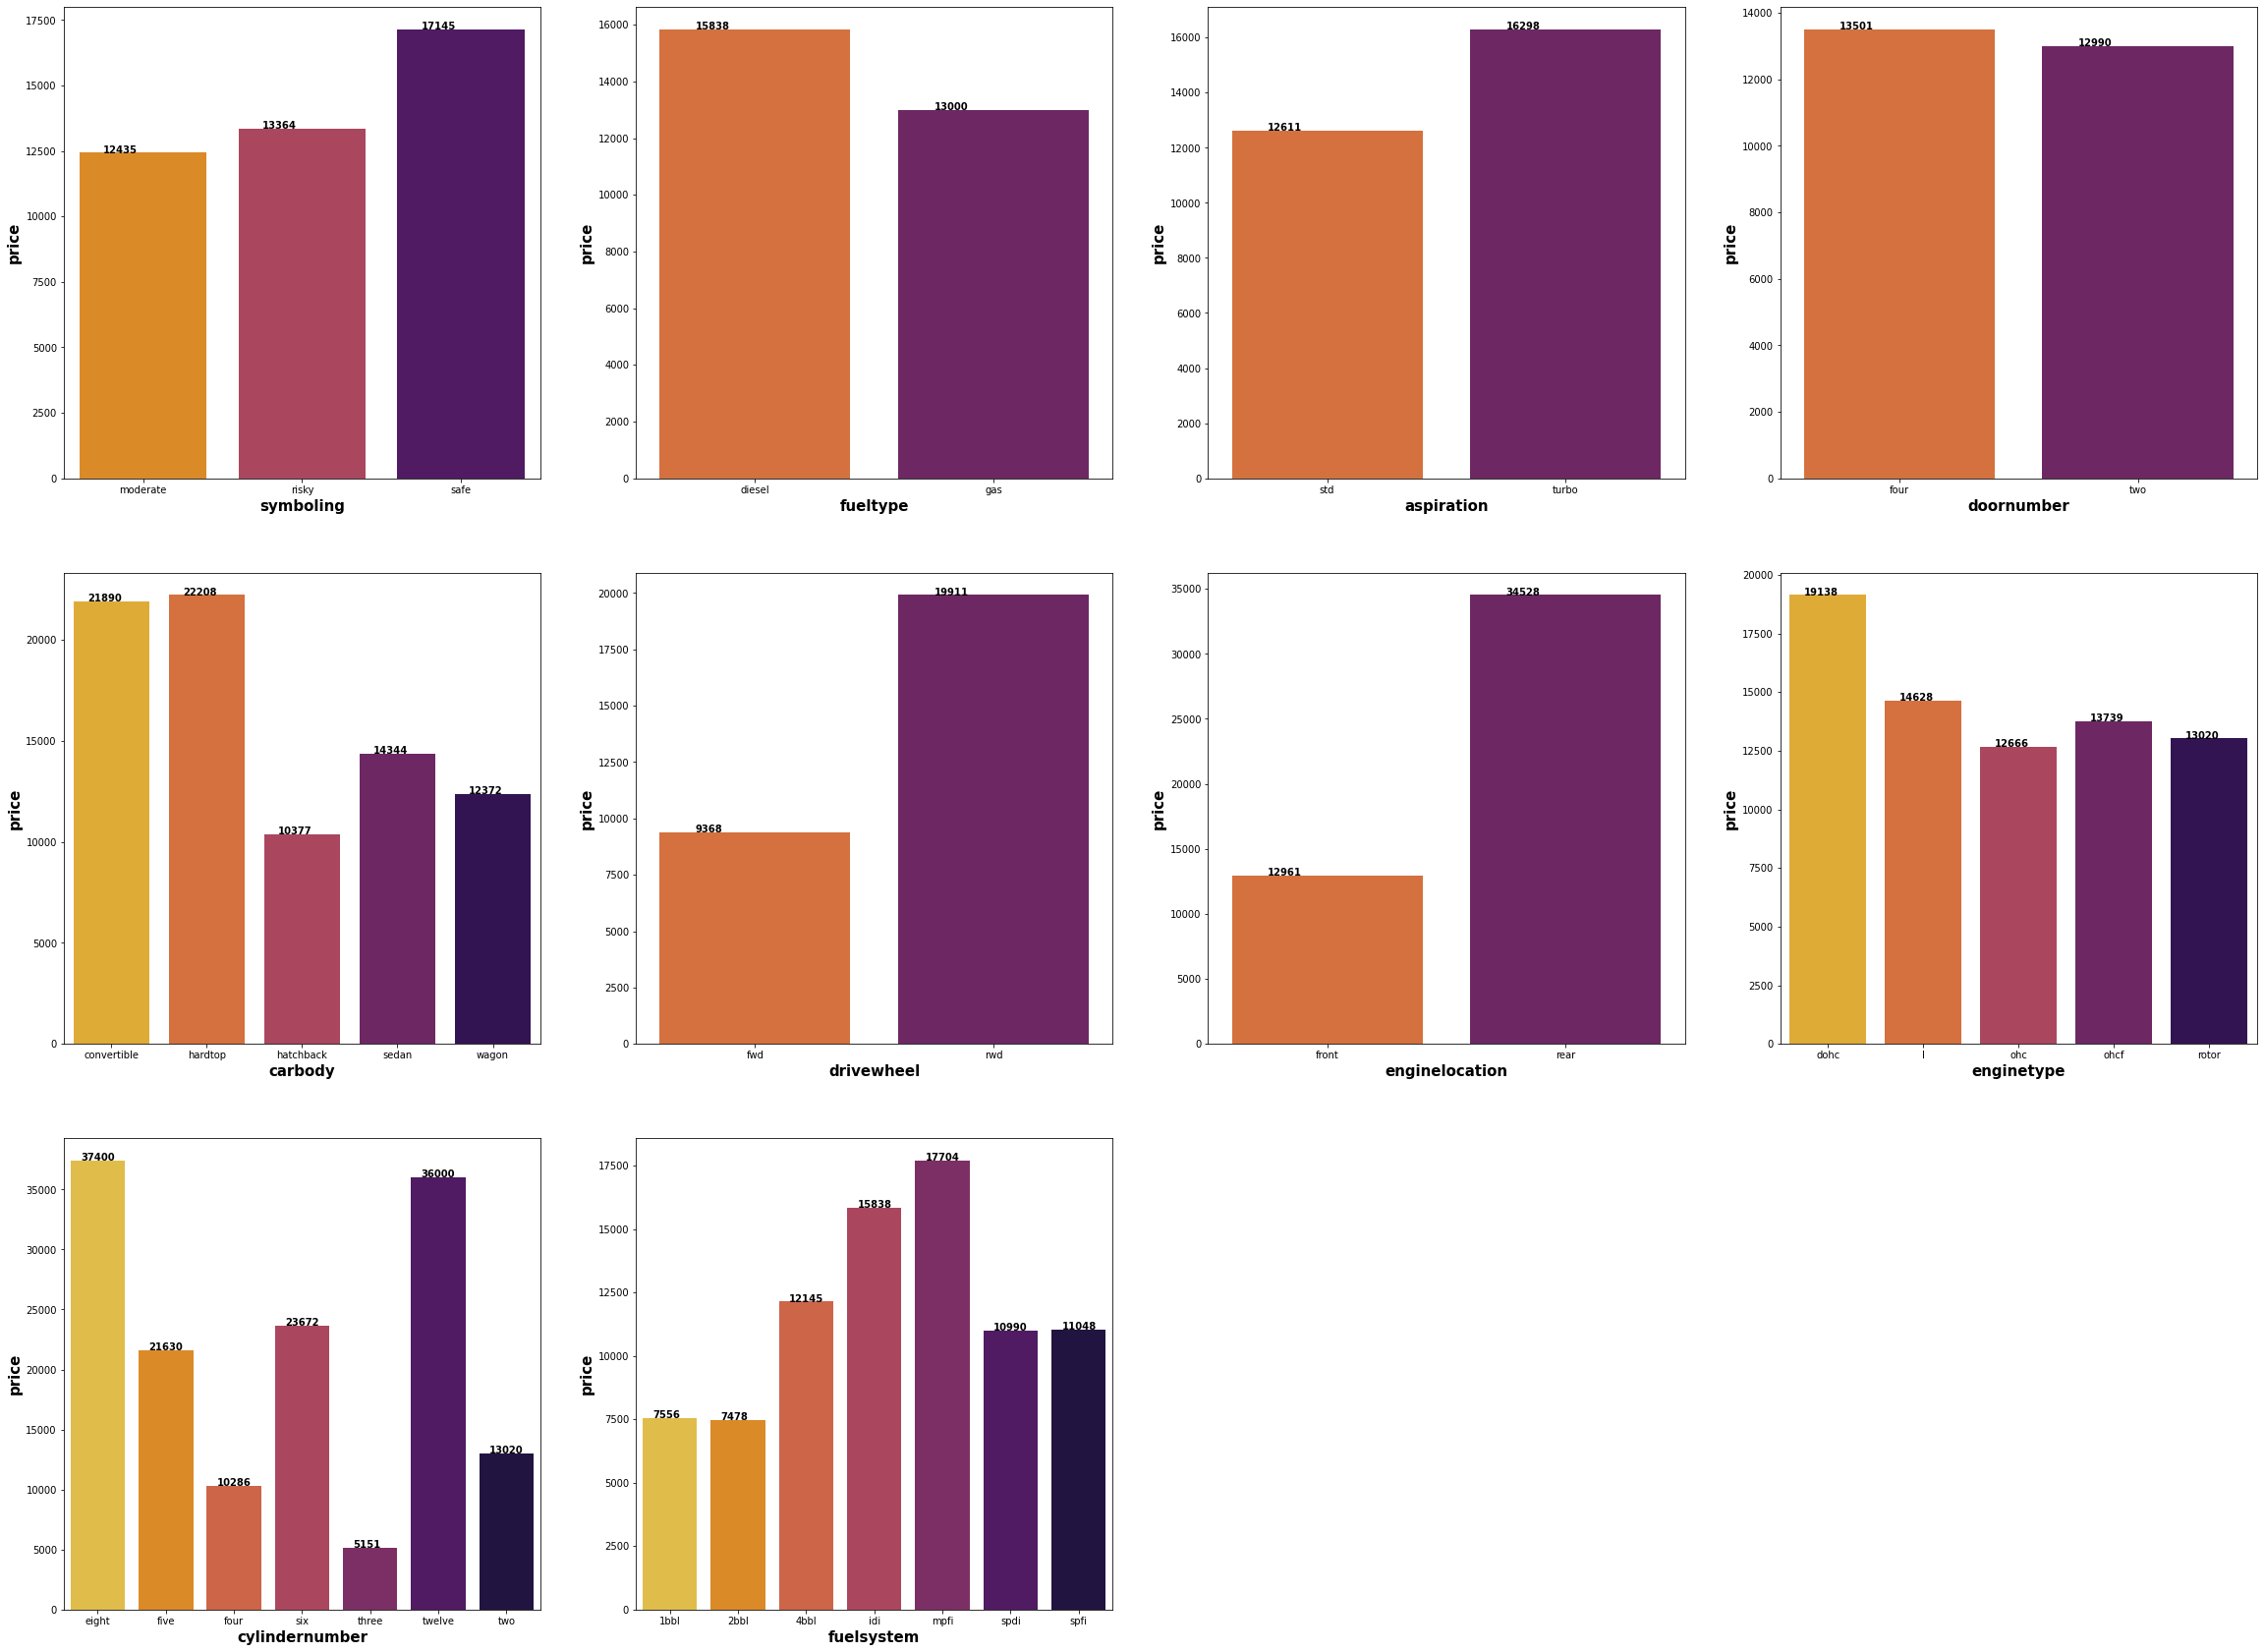

In [ ]:
# market percentage of car's with respect to features
plot_mean_price(car,categorical_features[:-1])

Hence from above graphs we can find out which feature is more expensive to have in our cars and use them suitably to increase the price of our cars

-------------------------------------------------------------------------------------------------------------------------

Let's find most expensive brand and most trending brand

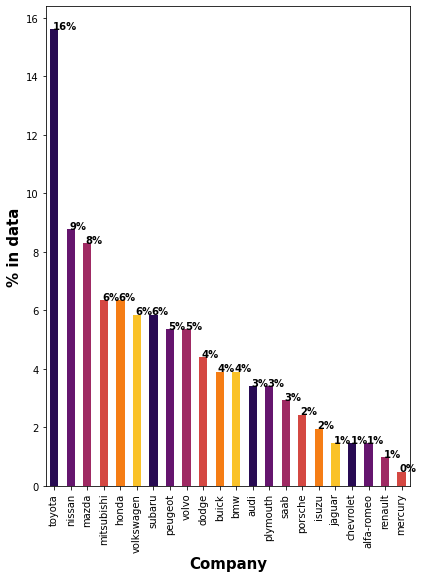

In [ ]:
plot_percentages(car,[categorical_features[-1]])

       Company         price
0   alfa-romeo  15498.333333
1         audi  17859.166714
2          bmw  26118.750000
3        buick  33647.000000
4    chevrolet   6007.000000
5        dodge   7875.444444
6        honda   8184.692308
7        isuzu   8916.500000
8       jaguar  34600.000000
9        mazda  10652.882353
10     mercury  16503.000000
11  mitsubishi   9239.769231
12      nissan  10415.666667
13     peugeot  15489.090909
14    plymouth   7963.428571
15     porsche  31400.500000
16     renault   9595.000000
17        saab  15223.333333
18      subaru   8541.250000
19      toyota   9885.812500
20  volkswagen  10077.500000
21       volvo  18063.181818


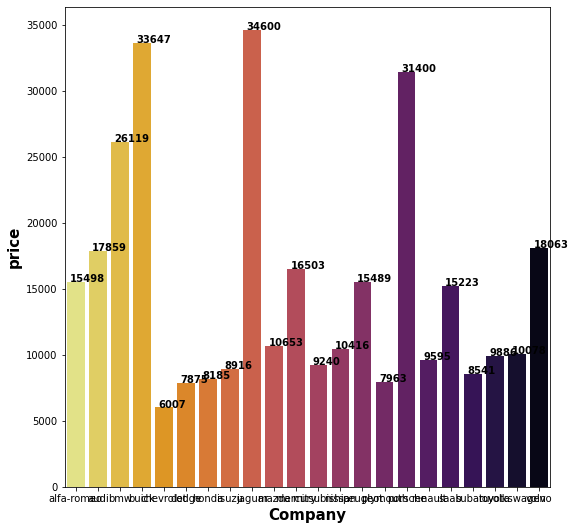

In [ ]:
plot_mean_price(car,[categorical_features[-1]])

##Hence 'Jaguar' is most expensive and 'Toyota' is most trending brand

Let us visualize through box plot


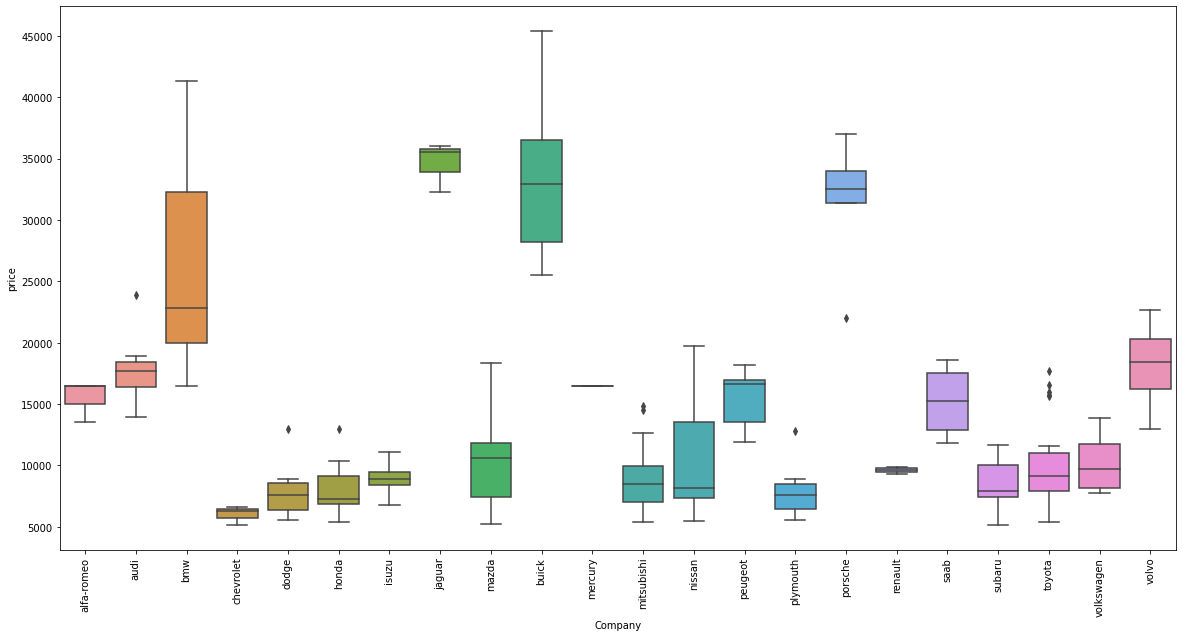

Average US car price:  13276.710570731706
Company
jaguar     34600.000000
buick      33647.000000
porsche    31400.500000
bmw        26118.750000
volvo      18063.181818
Name: price, dtype: float64


In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x = categorical_features[-1], y = 'price', data = car)
plt.xticks(rotation=90)
plt.show()
print('Average US car price: ',car['price'].mean())
print(car.groupby('Company').price.mean().sort_values(ascending=False).head())

We can see that car of companies like Porsche,Jaguar,BMW,Buick are expensive than others

Since the company name is also affecting the price of a car we will categorize companies into 3 tiers.
<li>1-Tier-Higher Price</li>
<li>2-Tier-Medium Price</li>
<li>3-Tier-Lower Price</li>

In [ ]:
def comp_seg(company):
  if company>20000:
    return '1-Tier'
  elif company>10000 and company<=20000:
    return '2-Tier'
  else:
    return '3-Tier'



In [ ]:
comp_segment=car[['Company','price']].groupby(['Company'],as_index=False).mean()

In [ ]:
comp_segment['tier']=comp_segment['price'].apply(comp_seg)

In [ ]:
comp_segment

,Company,price,tier
0,alfa-romeo,15498.333333,2-Tier
1,audi,17859.166714,2-Tier
2,bmw,26118.750000,1-Tier
3,buick,33647.000000,1-Tier
4,chevrolet,6007.000000,3-Tier
5,dodge,7875.444444,3-Tier
6,honda,8184.692308,3-Tier
7,isuzu,8916.500000,3-Tier
8,jaguar,34600.000000,1-Tier
9,mazda,10652.882353,2-Tier


In [ ]:
comp=comp_segment['Company'].to_list()
tier=comp_segment['tier'].to_list()

In [ ]:
dic={}

In [ ]:
for i in range(len(comp)):
  dic[comp[i]]=tier[i]

In [ ]:
car['company_segment']=car['Company'].map(dic)

In [ ]:
car.drop(['Company'],axis=1,inplace=True)

In [ ]:
car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_segment
0,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,2-Tier
1,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,2-Tier
2,moderate,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohc,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,2-Tier
3,risky,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,2-Tier
4,risky,gas,std,four,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,2-Tier


###Now let's treat the outliers

In [ ]:
from pprint import pprint

In [ ]:
numeric_variable=list(car.columns[car.dtypes!='object'])
pprint(numeric_variable)

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']


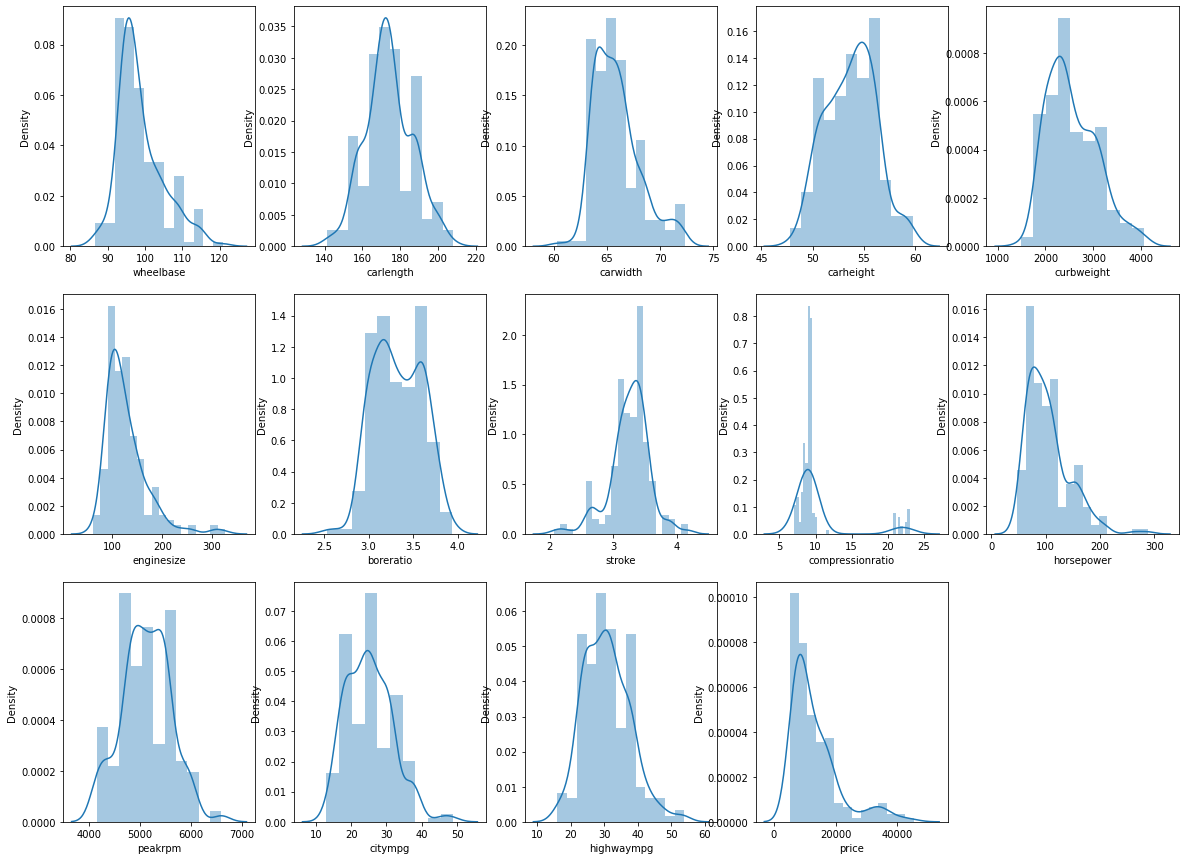

In [ ]:
plot_dist(numeric_variable)

Maybe due to outliers Engine Size,Horse Power,Compression Ratio are having right skewed distribution

In [ ]:
print(car[['horsepower','curbweight','enginesize']].quantile([0.01, .95]))
print(car[['compressionratio']].quantile([0.01, .90]))

      horsepower  curbweight  enginesize
0.01       52.12     1819.72        70.0
0.95      180.80     3503.00       201.2
      compressionratio
0.01              7.00
0.90             10.94


In [ ]:
car['horsepower'][np.abs(car['horsepower'] > 180.80)]= 180.80
car['horsepower'][np.abs(car['horsepower'] > 3503.00)]= 3503.00
car['enginesize'][np.abs(car['enginesize'] > 209.00)]= 209.00
car['compressionratio'][np.abs(car['compressionratio'] > 10.94)]= 10.94

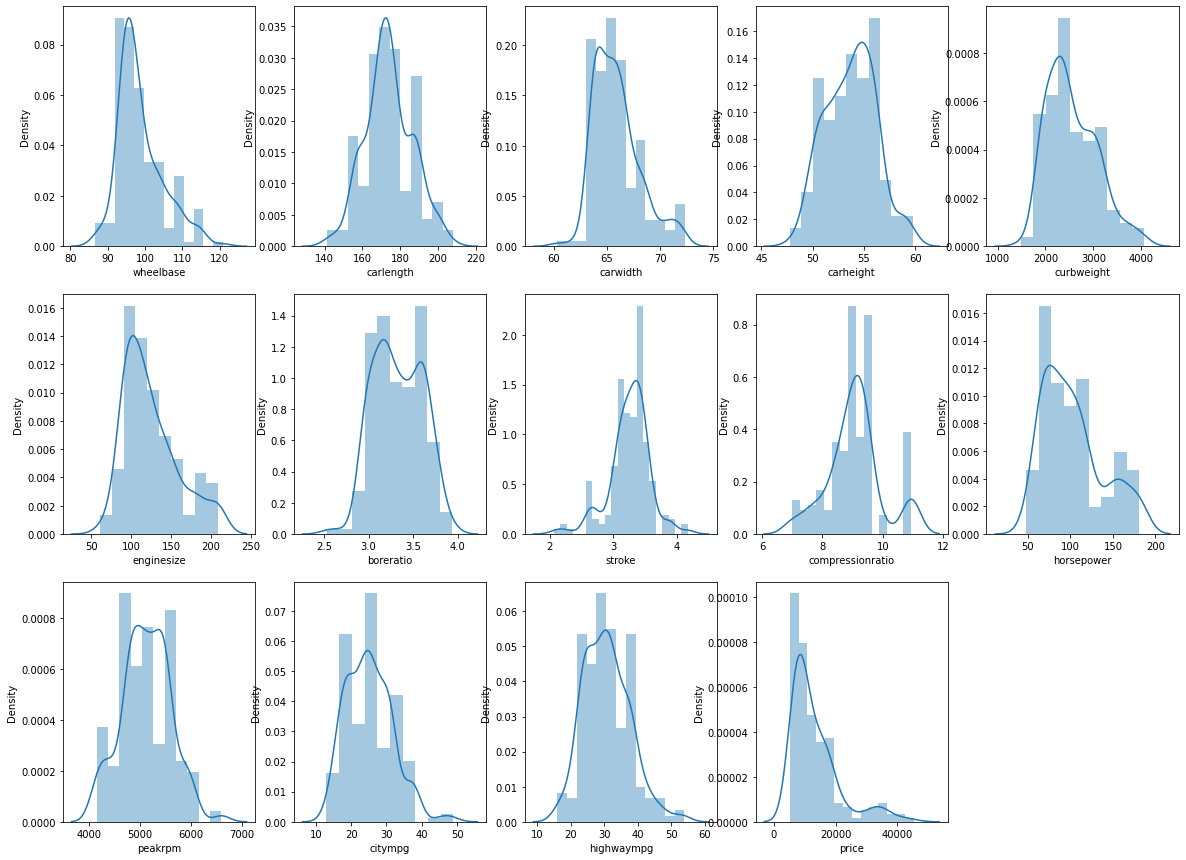

In [ ]:
#let's plot again
plot_dist(numeric_variable)

Before we build our model, let's create few more features

In [ ]:
# Creating new variables
car['carL/carWratio'] = car.carlength/car.carwidth
car['carW/carHratio'] = car.carwidth/car.carheight
car['carHP/carWratio'] = car.horsepower/car.curbweight
car['H/Cmpgratio'] = car.highwaympg/car.citympg
car.drop(['carlength','carwidth','carheight','highwaympg','citympg'],axis=1,inplace=True)

In [ ]:
#Creating dummy features
df=pd.get_dummies(car)

In [ ]:
df.head()

,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,carL/carWratio,carW/carHratio,carHP/carWratio,H/Cmpgratio,symboling_moderate,symboling_risky,symboling_safe,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_1-Tier,company_segment_2-Tier,company_segment_3-Tier
0,88.6,2548,130,3.47,2.68,9.0,111.0,5000,13495.0,2.633385,1.313525,0.043564,1.285714,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,88.6,2548,130,3.47,2.68,9.0,111.0,5000,16500.0,2.633385,1.313525,0.043564,1.285714,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,94.5,2823,152,2.68,3.47,9.0,154.0,5000,16500.0,2.613740,1.250000,0.054552,1.368421,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,99.8,2337,109,3.19,3.40,10.0,102.0,5500,13950.0,2.667674,1.219153,0.043646,1.250000,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,99.4,2824,136,3.19,3.40,8.0,115.0,5500,17450.0,2.659639,1.222836,0.040722,1.222222,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,company_segment,carL/carWratio,carW/carHratio,carHP/carWratio,H/Cmpgratio
0,risky,gas,std,two,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000,13495.0,2-Tier,2.633385,1.313525,0.043564,1.285714
1,risky,gas,std,two,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000,16500.0,2-Tier,2.633385,1.313525,0.043564,1.285714
2,moderate,gas,std,two,hatchback,rwd,front,94.5,2823,ohc,six,152,mpfi,2.68,3.47,9.0,154.0,5000,16500.0,2-Tier,2.613740,1.250000,0.054552,1.368421
3,risky,gas,std,four,sedan,fwd,front,99.8,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500,13950.0,2-Tier,2.667674,1.219153,0.043646,1.250000
4,risky,gas,std,four,sedan,fwd,front,99.4,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500,17450.0,2-Tier,2.659639,1.222836,0.040722,1.222222


Now we can drop 1 dummy feature

In [ ]:
df.drop(['symboling_risky',
         'carbody_hatchback',
         'drivewheel_rwd',
         'enginetype_l',
         'cylindernumber_three',
         'fuelsystem_1bbl',
         'company_segment_3-Tier'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'price', 'carL/carWratio',
       'carW/carHratio', 'carHP/carWratio', 'H/Cmpgratio',
       'symboling_moderate', 'symboling_safe', 'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo', 'doornumber_four',
       'doornumber_two', 'carbody_convertible', 'carbody_hardtop',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_rotor',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'company_segment_1-Tier', 'company_segment_2-Tier'],
      dtype='object')

###Let's move onto model building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

###Feature Scaling

In [ ]:
numeric=list(car.columns[car.dtypes!='object'])

In [ ]:
scaler=MinMaxScaler()

In [ ]:
df[numeric]=scaler.fit_transform(df[numeric])

In [ ]:
X=df.drop(['price'],axis=1)

In [ ]:
y=df['price']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.describe()

,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,carL/carWratio,carW/carHratio,carHP/carWratio,H/Cmpgratio,symboling_moderate,symboling_safe,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,drivewheel_fwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_ohc,enginetype_ohcf,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_1-Tier,company_segment_2-Tier
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.359477,0.420961,0.429030,0.557542,0.565501,0.518672,0.420560,0.410019,0.591725,0.381093,0.437171,0.361313,0.587413,0.125874,0.083916,0.916084,0.811189,0.188811,0.559441,0.440559,0.034965,0.027972,0.489510,0.118881,0.615385,0.986014,0.013986,0.083916,0.783217,0.055944,0.013986,0.027972,0.034965,0.797203,0.118881,0.006993,0.013986,0.300699,0.006993,0.083916,0.496503,0.041958,0.006993,0.118881,0.433566
std,0.177077,0.202625,0.223313,0.194528,0.146397,0.217212,0.261374,0.198854,0.195763,0.153892,0.180585,0.142289,0.494030,0.332873,0.278236,0.278236,0.392734,0.392734,0.498199,0.498199,0.184337,0.165472,0.501647,0.324786,0.488214,0.117845,0.117845,0.278236,0.413502,0.230621,0.117845,0.165472,0.184337,0.403496,0.324786,0.083624,0.117845,0.460174,0.083624,0.278236,0.501745,0.201198,0.083624,0.324786,0.497309
min,0.000000,0.128394,0.060811,0.000000,0.000000,0.000000,0.030120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.230321,0.272498,0.250000,0.435714,0.497619,0.393401,0.199548,0.265306,0.495186,0.275790,0.322794,0.281085,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.309038,0.370442,0.398649,0.550000,0.571429,0.507614,0.353916,0.428571,0.585582,0.350729,0.400571,0.356643,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.454810,0.568270,0.540541,0.714286,0.635714,0.609137,0.512048,0.551020,0.723300,0.459373,0.531453,0.422424,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,0.845481,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,

In [ ]:
X.describe()

,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,carL/carWratio,carW/carHratio,carHP/carWratio,H/Cmpgratio,symboling_moderate,symboling_safe,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,drivewheel_fwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_ohc,enginetype_ohcf,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_1-Tier,company_segment_2-Tier
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.354419,0.414106,0.430191,0.564111,0.564483,0.522917,0.411688,0.398009,0.582326,0.380854,0.431167,0.358960,0.590244,0.121951,0.097561,0.902439,0.819512,0.180488,0.560976,0.439024,0.029268,0.039024,0.468293,0.121951,0.629268,0.985366,0.014634,0.063415,0.785366,0.073171,0.019512,0.024390,0.053659,0.775610,0.117073,0.004878,0.019512,0.321951,0.014634,0.097561,0.463415,0.043902,0.004878,0.117073,0.419512
std,0.175562,0.201971,0.231176,0.193460,0.149332,0.227099,0.264980,0.194688,0.192133,0.148380,0.182036,0.137392,0.492993,0.328031,0.297446,0.297446,0.385535,0.385535,0.497483,0.497483,0.168970,0.194127,0.500215,0.328031,0.484183,0.120377,0.120377,0.244304,0.411573,0.261054,0.138655,0.154635,0.225894,0.418201,0.322294,0.069843,0.138655,0.468368,0.120377,0.297446,0.499880,0.205380,0.069843,0.322294,0.494687
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.230321,0.254849,0.243243,0.435714,0.495238,0.406091,0.165663,0.265306,0.495186,0.288924,0.312095,0.286195,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.303207,0.359193,0.398649,0.550000,0.580952,0.507614,0.353916,0.428571,0.585582,0.356773,0.391205,0.356643,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.460641,0.561288,0.540541,0.742857,0.638095,0.609137,0.512048,0.551020,0.701714,0.460845,0.537658,0.406699,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,

##We would be using Recursive Feature Elimination for eliminating features 

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
rfe=RFE(lr,n_features_to_select=15,step=1)

In [ ]:
rfe=rfe.fit(X_train,y_train)

In [ ]:
X_train.head()

,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,carL/carWratio,carW/carHratio,carHP/carWratio,H/Cmpgratio,symboling_moderate,symboling_safe,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,drivewheel_fwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_ohc,enginetype_ohcf,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_1-Tier,company_segment_2-Tier
177,0.460641,0.376261,0.412162,0.550000,0.700000,0.431472,0.331325,0.020408,0.585582,0.393229,0.383061,0.286195,0,1,0,1,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
75,0.469388,0.551590,0.533784,0.885714,0.500000,0.253807,0.956325,0.346939,0.559113,0.410966,0.880331,0.406699,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
174,0.460641,0.384794,0.331081,0.521429,0.609524,1.000000,0.188253,0.142857,0.585582,0.337165,0.208025,0.154545,0,1,1,0,0,1,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
31,0.000000,0.128394,0.209459,0.264286,0.638095,0.558376,0.210843,0.755102,0.000000,0.453372,0.478369,0.348974,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
12,0.425656,0.474011,0.695946,0.550000,0.533333,0.507614,0.549699,0.040816,0.721699,0.292452,0.541178,0.515152,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [ ]:
y_train.head()

177    0.152177
75     0.282632
174    0.138523
31     0.043121
12     0.393526
Name: price, dtype: float64

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('curbweight', False, 9),
 ('enginesize', False, 8),
 ('boreratio', True, 1),
 ('stroke', False, 22),
 ('compressionratio', False, 12),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('carL/carWratio', False, 19),
 ('carW/carHratio', True, 1),
 ('carHP/carWratio', True, 1),
 ('H/Cmpgratio', False, 15),
 ('symboling_moderate', False, 27),
 ('symboling_safe', False, 28),
 ('fueltype_diesel', False, 18),
 ('fueltype_gas', False, 20),
 ('aspiration_std', False, 4),
 ('aspiration_turbo', False, 16),
 ('doornumber_four', False, 30),
 ('doornumber_two', False, 21),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', True, 1),
 ('carbody_sedan', False, 31),
 ('carbody_wagon', False, 10),
 ('drivewheel_fwd', False, 29),
 ('enginelocation_front', True, 1),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohc', False, 2),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', True, 1),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_eight', True, 1),
 ('cylindernum

In [ ]:
support=X_train.columns[rfe.support_]

In [ ]:
support

Index(['wheelbase', 'boreratio', 'horsepower', 'peakrpm', 'carW/carHratio',
       'carHP/carWratio', 'carbody_convertible', 'carbody_hardtop',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_rotor', 'cylindernumber_eight',
       'company_segment_1-Tier'],
      dtype='object')

In [ ]:
X_train_rfe = X_train[support]

Now let's use stats model

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train2=sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train2).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     170.3
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           1.73e-75
Time:                        18:48:22   Log-Likelihood:                 244.59
No. Observations:                 143   AIC:                            -459.2
Df Residuals:                     128   BIC:                            -414.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

====================================================================================================


Now we will drop features with P value greater than 0.05

In [ ]:
X_train1=X_train_rfe.drop(['enginelocation_front','enginetype_ohcf'],axis=1)

In [ ]:
X_train2=sm.add_constant(X_train1)
lm = sm.OLS(y_train,X_train2).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     180.1
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           6.10e-76
Time:                        18:48:37   Log-Likelihood:                 242.83
No. Observations:                 143   AIC:                            -457.7
Df Residuals:                     129   BIC:                            -416.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [ ]:
X_train2_=X_train1.drop(['peakrpm'],axis=1)

In [ ]:
X_train2=sm.add_constant(X_train2_)
lm = sm.OLS(y_train,X_train2).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     192.1
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           1.79e-76
Time:                        18:48:38   Log-Likelihood:                 241.24
No. Observations:                 143   AIC:                            -456.5
Df Residuals:                     130   BIC:                            -418.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X2=X_train2_

In [ ]:
vif=pd.DataFrame()

In [ ]:
vif['Features']=X2.columns

In [ ]:
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [ ]:
vif

,Features,VIF
4,carHP/carWratio,31.32
2,horsepower,25.49
1,boreratio,14.40
0,wheelbase,10.32
3,carW/carHratio,9.99
8,enginetype_ohc,5.27
7,enginelocation_rear,2.73
6,carbody_hardtop,2.37
11,company_segment_1-Tier,2.14
10,cylindernumber_eight,1.65


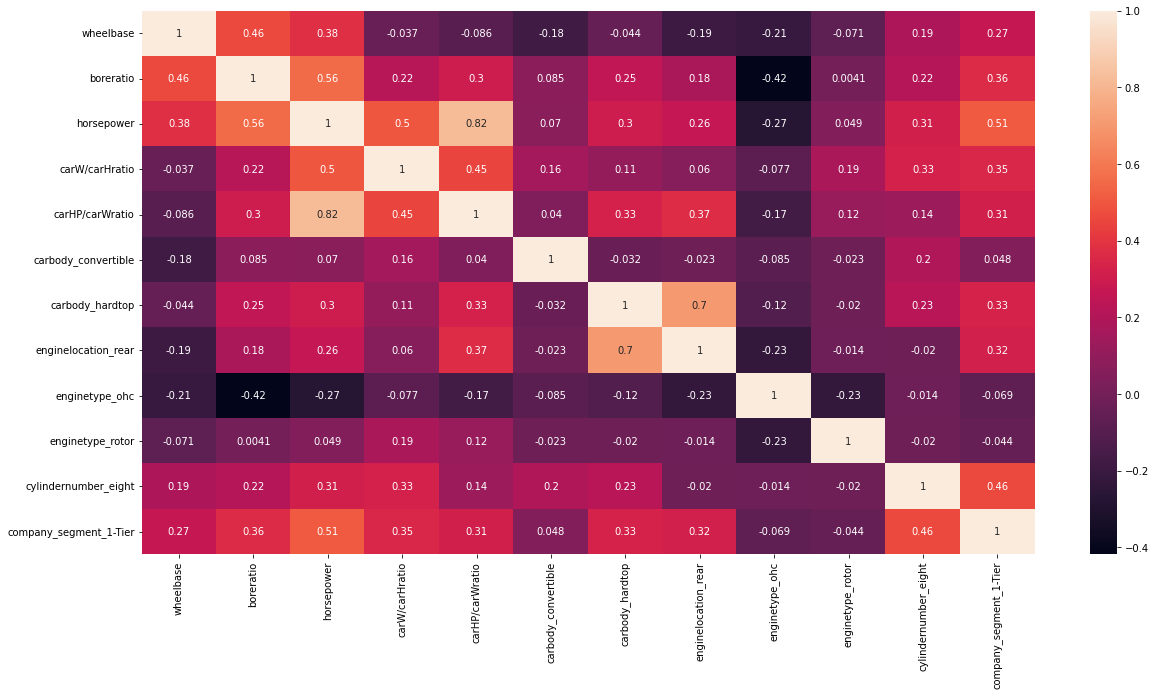

In [ ]:
plt.figure(figsize = (20,10))  
sns.heatmap(X2.corr(),annot = True)

CarHP/carWratio is highly corelated with horsepower and has high VIF, hence we will drop it

In [ ]:
X_train3=X_train2_.drop(['carHP/carWratio'],axis=1)

In [ ]:
X_train2=sm.add_constant(X_train3)
lm = sm.OLS(y_train,X_train2).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     158.8
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           4.56e-70
Time:                        18:48:44   Log-Likelihood:                 222.10
No. Observations:                 143   AIC:                            -420.2
Df Residuals:                     131   BIC:                            -384.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [ ]:
X_train4=X_train3.drop(['enginetype_ohc','enginetype_rotor','carbody_hardtop','boreratio'],axis=1)

In [ ]:
X_train2=sm.add_constant(X_train4)
lm = sm.OLS(y_train,X_train2).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     234.2
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           3.00e-72
Time:                        18:48:45   Log-Likelihood:                 215.93
No. Observations:                 143   AIC:                            -415.9
Df Residuals:                     135   BIC:                            -392.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [ ]:
vif2 = pd.DataFrame()
X3 = X_train4
vif2['Features'] = X3.columns
vif2['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif2['VIF'] = round(vif2['VIF'], 2)
vif2 = vif2.sort_values(by = "VIF", ascending = False)

In [ ]:
vif2

,Features,VIF
1,horsepower,7.50
2,carW/carHratio,5.37
0,wheelbase,4.66
6,company_segment_1-Tier,1.90
5,cylindernumber_eight,1.43
4,enginelocation_rear,1.37
3,carbody_convertible,1.14


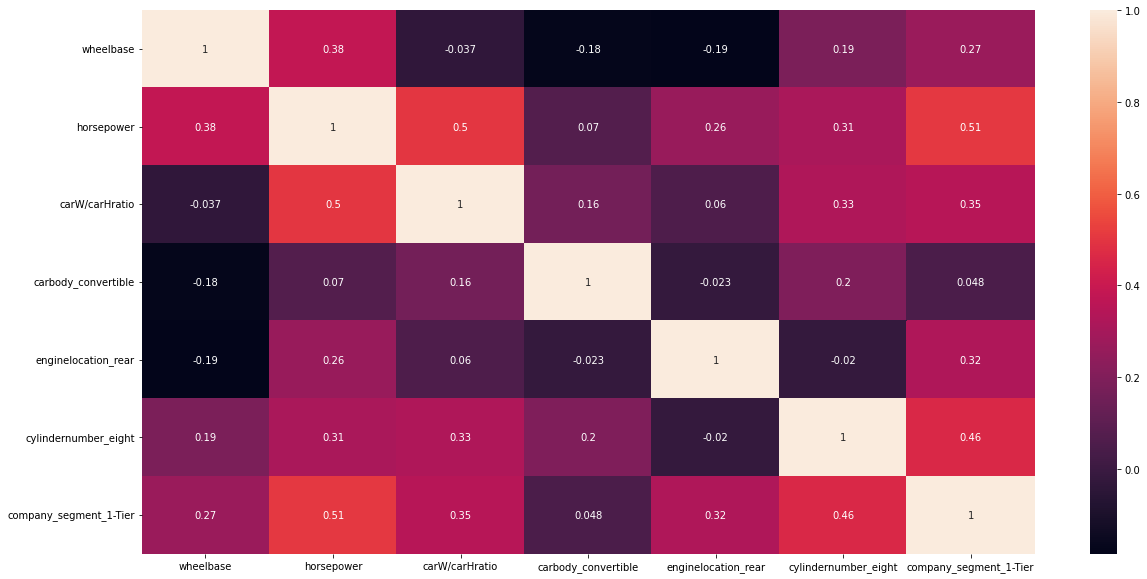

In [ ]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train4.corr(),annot = True)

We can drop carW/carHratio since it is highly corelated with horsepower

In [ ]:
X_train5=X_train4.drop(['carW/carHratio'],axis=1)

In [ ]:
X_train2=sm.add_constant(X_train5)
lm = sm.OLS(y_train,X_train2).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     250.6
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           6.07e-71
Time:                        18:48:48   Log-Likelihood:                 209.75
No. Observations:                 143   AIC:                            -405.5
Df Residuals:                     136   BIC:                            -384.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [ ]:
vif3 = pd.DataFrame()
X4 = X_train2
vif3['Features'] = X4.columns
vif3['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif3['VIF'] = round(vif3['VIF'], 2)
vif3 = vif3.sort_values(by = "VIF", ascending = False)

In [ ]:
vif3

,Features,VIF
0,const,6.92
6,company_segment_1-Tier,1.77
2,horsepower,1.61
1,wheelbase,1.45
5,cylindernumber_eight,1.40
4,enginelocation_rear,1.37
3,carbody_convertible,1.12


In [ ]:
y_train_price = lm.predict(X_train2)

Text(0.5, 0, 'Errors')

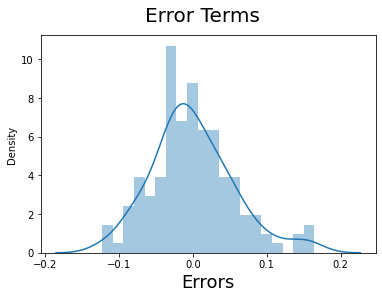

In [ ]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

Normal Distribution is not exactly centered around zero hence there might be some error


In [ ]:
X_train7=X_train2.drop(['const'],axis=1)

In [ ]:
X_test2=X_test[X_train7.columns]

In [ ]:
X_test2 = sm.add_constant(X_test2)

In [ ]:
y_pred=lm.predict(X_test2)

#Let's Evaluate our Model through visualization and few scores

Text(0, 0.5, 'y_pred')

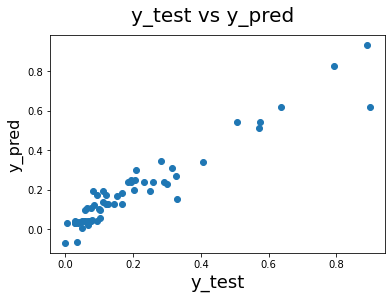

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)  

y_test VS y_pred is observed to be almost linear with some variataion occuring. Overall, it is a pretty linear spread.

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

Model RMSE: 0.0605486393696174


In [ ]:
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model r2_score: 0.9141390873444959


Our r2_score for test data is pretty close to Adj. r-squared. hence we can adapt this model

Let us identify most iportant feature with the help of RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestRegressor()

In [ ]:
rf.fit(X_train,y_train)

RandomForestRegressor()

Text(0.5, 0, 'Feature Importance')

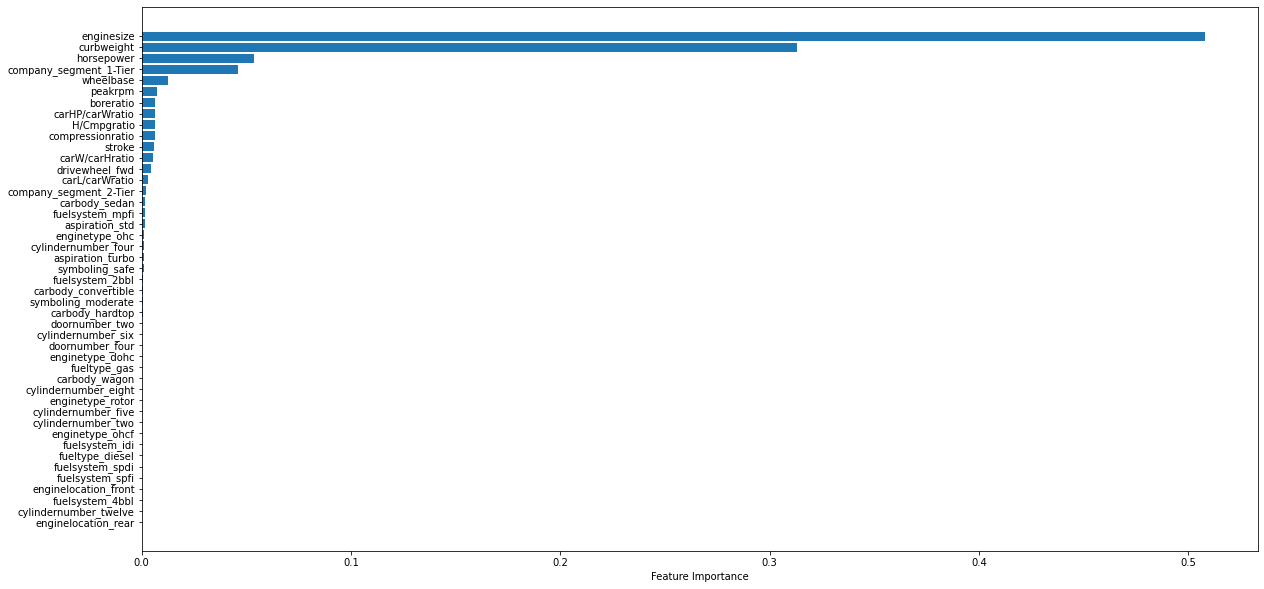

In [ ]:
plt.figure(figsize=(20,10))
sort = rf.feature_importances_.argsort()
plt.barh(X_train.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")


In [ ]:
ran=rf.feature_importances_

In [ ]:
columns=X_train.columns

In [ ]:
values3={}
for i in range(len(X_train.columns)-1):
  values3[columns[i]]=ran[i]

In [ ]:
values3

{'wheelbase': 0.012698068061037562,
 'curbweight': 0.3131012950736495,
 'enginesize': 0.5077495709905432,
 'boreratio': 0.006456129267614776,
 'stroke': 0.005656155219314568,
 'compressionratio': 0.006170817990479836,
 'horsepower': 0.053752698048824044,
 'peakrpm': 0.0070718126459630645,
 'carL/carWratio': 0.0029522826357105967,
 'carW/carHratio': 0.005164738008442673,
 'carHP/carWratio': 0.00636977167775194,
 'H/Cmpgratio': 0.006228418287944563,
 'symboling_moderate': 0.0006098800039512774,
 'symboling_safe': 0.0008817326070398553,
 'fueltype_diesel': 5.647723240101141e-05,
 'fueltype_gas': 0.00022503206555131157,
 'aspiration_std': 0.0014183029828841434,
 'aspiration_turbo': 0.0009140458633091947,
 'doornumber_four': 0.00027515529908883206,
 'doornumber_two': 0.00036841190296686065,
 'carbody_convertible': 0.0007177273324021788,
 'carbody_hardtop': 0.00042775890985384903,
 'carbody_sedan': 0.0017858641718541807,
 'carbody_wagon': 0.00021985966914500466,
 'drivewheel_fwd': 0.00459417

In [ ]:
values3['enginesize']

0.5077495709905432

Hence 'EngineSize' is the most important feature in deciding car price with a score of 0.5077

<img src='https://assets.whichcar.com.au/image/upload/s--mTvYq3y5--/c_fill,f_auto,q_auto:good/c_scale,w_768/v1/archive/whichcar/2016/07/01/-1/Engine-sizes-2.jpg'>

#Thank You!!